In [1]:
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126


In [2]:
!pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch==2.1.2 (from versions: 2.2.0+cu118, 2.2.1+cu118, 2.2.2+cu118, 2.3.0+cu118, 2.3.1+cu118, 2.4.0+cu118, 2.4.1+cu118, 2.5.0+cu118, 2.5.1+cu118, 2.6.0+cu118, 2.7.0+cu118, 2.7.1+cu118)
ERROR: No matching distribution found for torch==2.1.2


In [3]:
!pip install basicsr opencv-python-headless matplotlib Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached torch-2.9.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.9

In [4]:
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 104.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [6]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url
from basicsr.utils import img2tensor, tensor2img

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


Loading image from: /content/drive/MyDrive/bridge.jpg
Image loaded successfully.
Original image shape: (189, 202, 3)


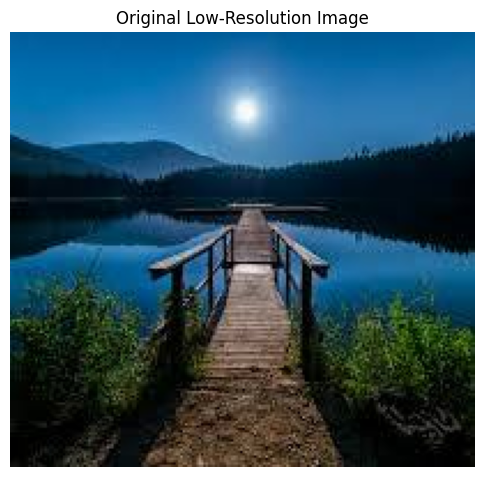

In [7]:
LOW_RES_IMAGE_PATH = '/content/drive/MyDrive/bridge.jpg'
HIGH_RES_OUTPUT_PATH = '/content/drive/MyDrive/your_image_folder/high_quality_image_basicsr.png'


print(f"Loading image from: {LOW_RES_IMAGE_PATH}")
try:
    lr_img_pil = Image.open(LOW_RES_IMAGE_PATH).convert('RGB')
    lr_img_np = np.array(lr_img_pil)
    print("Image loaded successfully.")
    print(f"Original image shape: {lr_img_np.shape}")
except Exception as e:
    print(f"Error loading image: {e}")
    raise


plt.figure(figsize=(6, 6))
plt.imshow(lr_img_np)
plt.title("Original Low-Resolution Image")
plt.axis('off')
plt.show()

In [8]:
model_name = 'RealESRGAN_x4plus'
model_url = 'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth'
scale = 4


print("Loading ESRGAN model...")
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=scale)
model_path = load_file_from_url(url=model_url, model_dir='weights', progress=True)

checkpoint = torch.load(model_path, map_location=device)
if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
    model.load_state_dict(checkpoint['state_dict'], strict=True)
elif 'params_ema' in checkpoint:
    model.load_state_dict(checkpoint['params_ema'], strict=True)
else:
    model.load_state_dict(checkpoint, strict=True)

model.eval()
model = model.to(device)

img_tensor = img2tensor(lr_img_np / 255., bgr2rgb=False, float32=True).unsqueeze(0).to(device)

with torch.no_grad():
    output_tensor = model(img_tensor)


sr_img_np = tensor2img(output_tensor.squeeze(0), rgb2bgr=False, out_type=np.uint8)
sr_img_pil = Image.fromarray(sr_img_np)
print("Execution Successful...")

Loading ESRGAN model...
Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth" to /content/weights/RealESRGAN_x4plus.pth



100%|██████████| 63.9M/63.9M [00:00<00:00, 108MB/s] 


Execution Successful...


High-resolution image saved at: /content/drive/MyDrive/your_image_folder/high_quality_image_basicsr.png


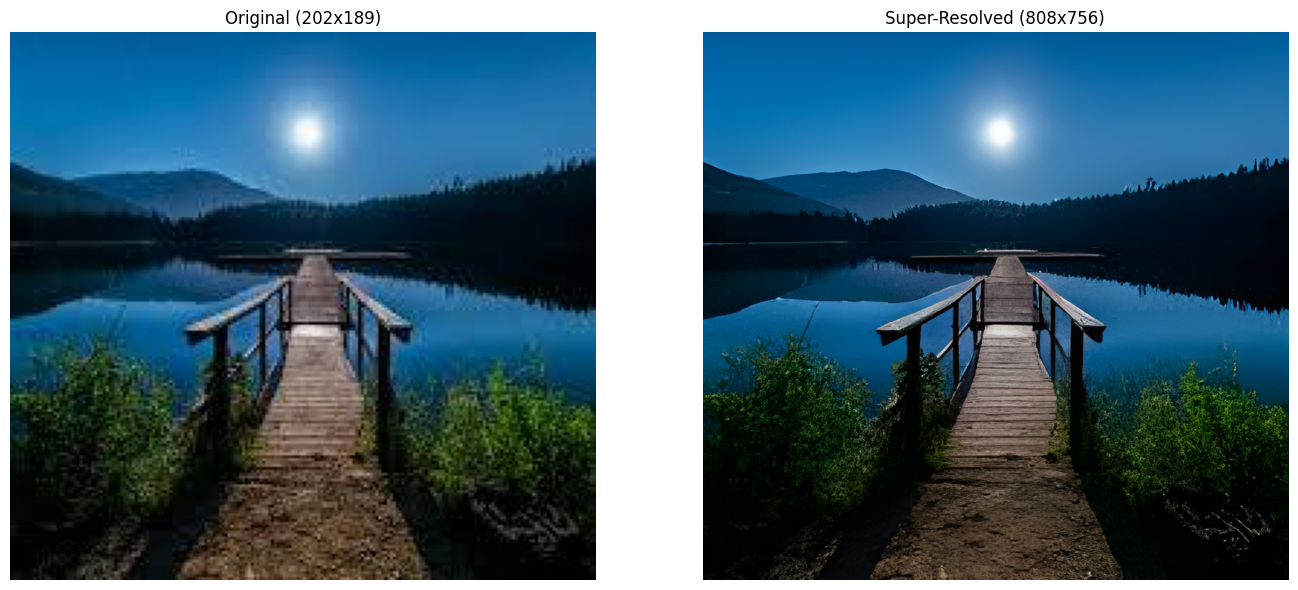

In [9]:
sr_img_pil.save(HIGH_RES_OUTPUT_PATH)
print(f"High-resolution image saved at: {HIGH_RES_OUTPUT_PATH}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(lr_img_np)
plt.title(f"Original ({lr_img_np.shape[1]}x{lr_img_np.shape[0]})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sr_img_np)
plt.title(f"Super-Resolved ({sr_img_np.shape[1]}x{sr_img_np.shape[0]})")
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
pip install gradio torch torchvision basicsr opencv-python-headless matplotlib Pillow

In [11]:
import gradio as gr
import torch
#import numpy as np
from PIL import Image
#from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url
from basicsr.utils import img2tensor, tensor2img

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def load_model():
    model_name = 'RealESRGAN_x4plus'
    model_url = 'https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth'
    scale = 4

    model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64,
                    num_block=23, num_grow_ch=32, scale=scale)

    model_path = load_file_from_url(url=model_url, model_dir='weights', progress=True)

    checkpoint = torch.load(model_path, map_location=device)
    if isinstance(checkpoint, dict) and 'state_dict' in checkpoint:
        model.load_state_dict(checkpoint['state_dict'], strict=True)
    elif 'params_ema' in checkpoint:
        model.load_state_dict(checkpoint['params_ema'], strict=True)
    else:
        model.load_state_dict(checkpoint, strict=True)

    model.eval()
    model = model.to(device)
    return model

model = load_model()

def upscale_image(input_image):

    lr_img_np = np.array(input_image.convert("RGB"))
    orig_shape = lr_img_np.shape


    img_tensor = img2tensor(lr_img_np / 255., bgr2rgb=False, float32=True).unsqueeze(0).to(device)


    with torch.no_grad():
        output_tensor = model(img_tensor)


    sr_img_np = tensor2img(output_tensor.squeeze(0), rgb2bgr=False, out_type=np.uint8)
    sr_img_pil = Image.fromarray(sr_img_np)

    return input_image, sr_img_pil


title = "🧠 PixelUp - Image Enhancer using ESRGAN"
description = "Upload a low-resolution image and PixelUp will generate a high-resolution version using Real-ESRGAN."

demo = gr.Interface(
    fn=upscale_image,
    inputs=gr.Image(type="pil", label="Upload Low-Resolution Image"),
    outputs=[
        gr.Image(type="pil", label="Original Image"),
        gr.Image(type="pil", label="Super-Resolved Image")
    ],
    title=title,
    description=description,
    allow_flagging="never"
)

if __name__ == "__main__":
    demo.launch()


/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://05a02d46acef5cb4cd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
